#### This notebook works on forecasting of power consumption of the AC's individually, so the individual power consumption forecasting can be done on all 18 AC's

#### we will be using the LSTM neural netrwork to make the forecasting of power consumption.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
df=pd.read_csv(r'C:/Users/navee/Desktop/final_data.csv')

In [3]:
df.head()

,Unnamed: 0,Time,AC1,AC2,AC3,AC4,AC5,AC6,AC7,AC8,...,AC12,AC13,AC14,AC15,AC16,AC17,AC18,avg_temp,max_temp,min_temp
0,0,2019-08-01 00:00:00,7.518632,8.788315,0.0,0.0,2.617045,4.079041,2.782276,4.624447,...,0.560373,3.142941,2.749470,5.417774,4.113460,3.305072,6.735981,55,69,41
1,2,2019-08-01 00:02:00,7.426114,8.940615,0.0,0.0,2.581625,3.781231,2.529366,5.057423,...,1.818730,3.085110,2.720484,3.302422,3.986483,3.220588,6.379500,55,69,41
2,4,2019-08-01 00:04:00,7.052986,9.161103,0.0,0.0,2.592095,3.800127,2.332304,6.322521,...,2.310409,3.132799,2.676861,3.539026,3.797881,3.131560,6.363475,55,69,41
3,6,2019-08-01 00:06:00,6.665446,9.065626,0.0,0.0,2.575639,3.772891,2.596200,5.805132,...,2.510972,3.090007,2.666604,4.607439,3.062610,3.063953,6.127366,55,69,41
4,8,2019-08-01 00:08:00,6.674838,9.096130,0.0,0.0,2.021472,3.155697,2.845417,6.315060,...,2.171791,3.097202,2.710572,5.332696,2.640150,2.864680,5.662474,55,69,41


In [4]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [5]:
df.head()

,Time,AC1,AC2,AC3,AC4,AC5,AC6,AC7,AC8,AC9,...,AC12,AC13,AC14,AC15,AC16,AC17,AC18,avg_temp,max_temp,min_temp
0,2019-08-01 00:00:00,7.518632,8.788315,0.0,0.0,2.617045,4.079041,2.782276,4.624447,5.222060,...,0.560373,3.142941,2.749470,5.417774,4.113460,3.305072,6.735981,55,69,41
1,2019-08-01 00:02:00,7.426114,8.940615,0.0,0.0,2.581625,3.781231,2.529366,5.057423,5.349465,...,1.818730,3.085110,2.720484,3.302422,3.986483,3.220588,6.379500,55,69,41
2,2019-08-01 00:04:00,7.052986,9.161103,0.0,0.0,2.592095,3.800127,2.332304,6.322521,3.995392,...,2.310409,3.132799,2.676861,3.539026,3.797881,3.131560,6.363475,55,69,41
3,2019-08-01 00:06:00,6.665446,9.065626,0.0,0.0,2.575639,3.772891,2.596200,5.805132,3.553778,...,2.510972,3.090007,2.666604,4.607439,3.062610,3.063953,6.127366,55,69,41
4,2019-08-01 00:08:00,6.674838,9.096130,0.0,0.0,2.021472,3.155697,2.845417,6.315060,3.042244,...,2.171791,3.097202,2.710572,5.332696,2.640150,2.864680,5.662474,55,69,41


In [6]:
df1=df.reset_index()['AC1']

In [7]:
df1.head()

0    7.518632
1    7.426114
2    7.052986
3    6.665446
4    6.674838
Name: AC1, dtype: float64

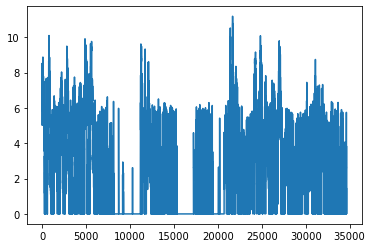

In [8]:
import matplotlib.pyplot as plt
plt.plot(df1)

#### standard scaling the data in range 0 to 1, so it can be scaled and perform better in the LSTM model

In [9]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [10]:
df1

array([[0.67161889],
       [0.66335455],
       [0.630024  ],
       ...,
       [0.        ],
       [0.10801236],
       [0.12777748]])

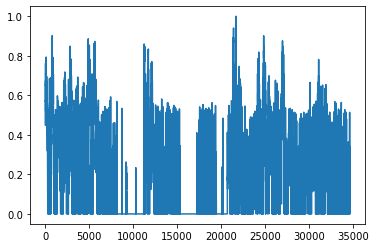

In [11]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [12]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [13]:
training_size,test_size

(22517, 12125)

#### this method will shift the AC1 value to 100 and will provide 100 value for the prediction to the model to learn. After learnig from previous 100 datapoints the model can recognise the pattern and start the forecasting process.

In [14]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [15]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [16]:
print(X_train.shape)
print(y_train.shape)

(22416, 100)
(22416,)


In [17]:
print(X_test.shape)
print(ytest.shape)

(12024, 100)
(12024,)


In [18]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [21]:
!pip install tensorflow==2.2

  Using cached tensorflow-2.2.0-cp38-cp38-win_amd64.whl (459.2 MB)
  Using cached gast-0.3.3-py2.py3-none-any.whl (9.7 kB)
  Using cached h5py-2.10.0-cp38-cp38-win_amd64.whl (2.5 MB)
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
  Attempting uninstall: gast
    Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Successfully uninstalled gast-0.4.0


In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [23]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
351/351 [==============================] - 56s 160ms/step - loss: 0.0097 - val_loss: 0.0109
Epoch 2/100
351/351 [==============================] - 55s 157ms/step - loss: 0.0063 - val_loss: 0.0053
Epoch 3/100
351/351 [==============================] - 55s 158ms/step - loss: 0.0046 - val_loss: 0.0051
Epoch 4/100
351/351 [==============================] - 57s 164ms/step - loss: 0.0045 - val_loss: 0.0051
Epoch 5/100
351/351 [==============================] - 85s 242ms/step - loss: 0.0044 - val_loss: 0.0051
Epoch 6/100
351/351 [==============================] - 60s 171ms/step - loss: 0.0044 - val_loss: 0.0053
Epoch 7/100
351/351 [==============================] - 69s 197ms/step - loss: 0.0044 - val_loss: 0.0052
Epoch 8/100
351/351 [==============================] - 59s 168ms/step - loss: 0.0043 - val_loss: 0.0059
Epoch 9/100
351/351 [==============================] - 65s 186ms/step - loss: 0.0043 - val_loss: 0.0051
Epoch 10/100
351/351 [==============================] - 71s 202m

351/351 [==============================] - 63s 181ms/step - loss: 0.0025 - val_loss: 0.0050
Epoch 80/100
351/351 [==============================] - 69s 196ms/step - loss: 0.0025 - val_loss: 0.0049
Epoch 81/100
351/351 [==============================] - 64s 182ms/step - loss: 0.0025 - val_loss: 0.0051
Epoch 82/100
351/351 [==============================] - 67s 192ms/step - loss: 0.0026 - val_loss: 0.0050
Epoch 83/100
351/351 [==============================] - 66s 187ms/step - loss: 0.0024 - val_loss: 0.0051
Epoch 84/100
351/351 [==============================] - 66s 189ms/step - loss: 0.0024 - val_loss: 0.0050
Epoch 85/100
351/351 [==============================] - 66s 188ms/step - loss: 0.0024 - val_loss: 0.0052
Epoch 86/100
351/351 [==============================] - 65s 185ms/step - loss: 0.0024 - val_loss: 0.0049
Epoch 87/100
351/351 [==============================] - 67s 192ms/step - loss: 0.0023 - val_loss: 0.0052
Epoch 88/100
351/351 [==============================] - 64s 184ms/st

In [26]:
import tensorflow as tf

In [27]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [28]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [29]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

2.858867345201093

In [30]:
math.sqrt(mean_squared_error(ytest,test_predict))

3.0428959436360152

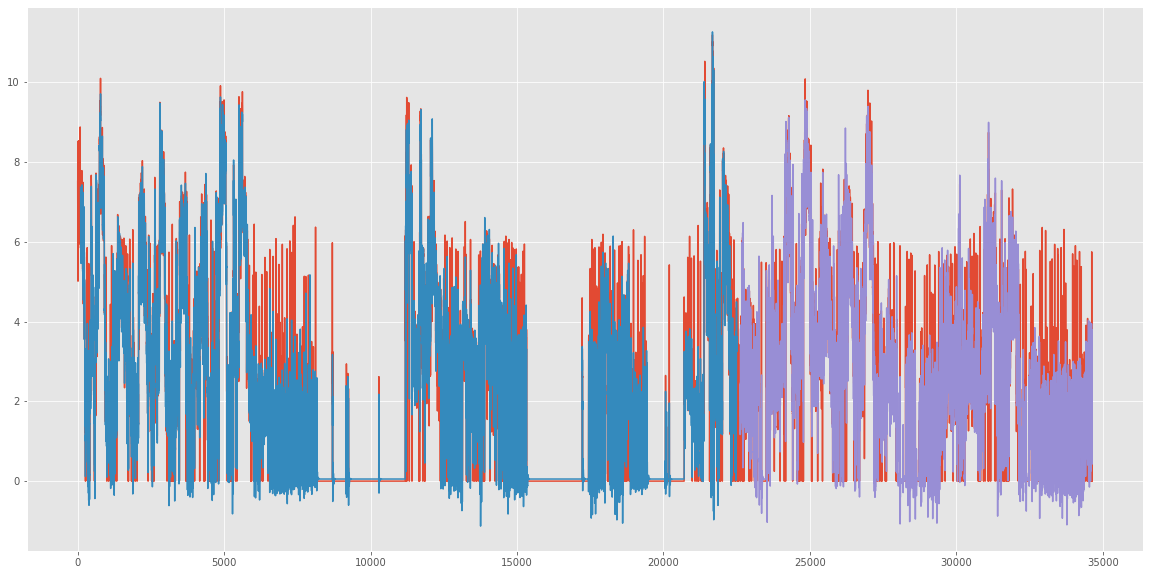

In [32]:
plt.rcParams['figure.figsize']=(20,10)
plt.style.use('ggplot')
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

#### As it can be seen from the forecasting that the model performed well on the dataset, it is almost close to the actual value of the power consumption  